In [1]:
import pandas as pd
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from PIL import Image
import json
from keras.models import model_from_json
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
face_cascade = cv2.CascadeClassifier('../../data/haarcascade_frontalface_default.xml')

In [3]:
def getFace(img):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)

    # Ensure there is at least 1 face
    if len(faces) > 0:
        print("Face detected!")
        x,y,w,h = faces[0]
        return new_size(img_bw[y:y+h,x:x+w])
    else:
        raise ValueError("No face found")
        
        
def openImageAndDetectFaces(path):
    img = cv2.imread(path)
    plt.imshow(img)
    try:
        print(f"Detecting faces in {path}")
        face_patch = getFace(img)
        return face_patch
    except ValueError as e:
        print(f"Not found image in {path}")
        return None

def new_size(img):
    size=(48,48)
    convert_to = Image.fromarray(img)
    convert_from = convert_to.resize(size)
    face=asarray(convert_from)/255
    return face

In [4]:
with open('fer.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('fer_model.h5')

Detecting faces in ../../data/antonio.jpg
Face detected!
Probs -> angry:0.00000 disgust:0.00000 fear:0.00002 happy:0.99964 sadness:0.00000 surprise:0.00000 neutral:0.00034


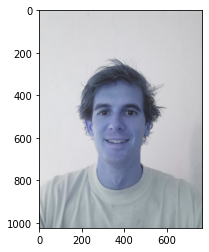

In [5]:
PIC = openImageAndDetectFaces("../../data/antonio.jpg")
['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f} neutral:{6:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5], pred2[6]))

In [6]:
df=pd.read_csv('../../data/songs_clean.csv')

In [7]:
df.head()

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,danceability,energy,acousticness,instrumentalness,liveness,neg,pos,neu,senti
0,1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,0.303,0.880,0.01170,0.00994,0.3470,0.036,0.294,0.670,angry
1,2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,0.845,0.652,0.00432,0.00723,0.4890,0.075,0.159,0.766,fear
2,3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,0.425,0.378,0.68900,0.00000,0.0664,0.093,0.155,0.752,nothing
3,4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,0.760,0.887,0.03700,0.00000,0.1380,0.363,0.051,0.586,happy
4,5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,r&b,0.496,0.639,0.28000,0.00000,0.0975,0.138,0.175,0.687,disgust


In [8]:
df[df["senti"]=="happy"].sample(n=1)

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,danceability,energy,acousticness,instrumentalness,liveness,neg,pos,neu,senti
8997,10744,What's Your Fantasy (Featuring Shawna),Ludacris,"Yeah, yeah, yeah, yeah Give it to me now, give...",63,Back For The First Time,2000-01-01,Hip-Hop Drive,rap,0.915,0.79,0.16,0.0,0.112,0.031,0.112,0.857,happy


In [9]:
df[df["senti"]=="happy"].sample(n=1).iloc[0]["track_name"]

'Scars To Your Beautiful - NOTD Remix'

Detecting faces in ../../data/nicola.jpeg
Face detected!
Today you are neutral. I recommend the song Scars by Papa Roach from the album  To Be Loved: The Best Of Papa Roach (Explicit Version). You can find in the Spotify playlist call New Hard Rock


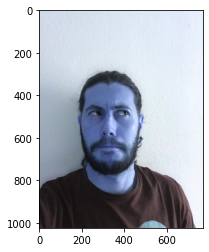

In [10]:
PIC = openImageAndDetectFaces("../../data/nicola.jpeg")
senti= ['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
pred2 = model.predict(PIC)[0]
feeling=senti[max(range(len(pred2)), key = lambda x: pred2[x])]
feeling_song= df[df["senti"]==feeling].sample(n=1)
song= feeling_song.iloc[0]["track_name"]
artist= feeling_song.iloc[0]["track_artist"]
album= feeling_song.iloc[0]["track_album_name"]
playlist= feeling_song.sample(n=1).iloc[0]["playlist_name"]

print(f'Today you are {senti[max(range(len(pred2)), key = lambda x: pred2[x])]}. I recommend the song {song} by {artist} from the album  {album}. You can find in the Spotify playlist call {playlist}')

In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = webdriver.ChromeOptions()
options.add_argument("start-maximized")
options.add_argument("disable-infobars")
options.add_argument("--disable-extensions")
driver=webdriver.Chrome(chrome_options=options, executable_path=r'../../data/chromedriver')
driver.get("https://www.youtube.com/")
WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input#search"))).send_keys("Python")
driver.find_element_by_css_selector("button.style-scope.ytd-searchbox#search-icon-legacy").click()
a=[my_href.get_attribute("href") for my_href in WebDriverWait(driver, 5).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR, "a.yt-simple-endpoint.style-scope.ytd-video-renderer#video-title")))][0]

/home/jorge/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [31]:
a

'https://www.youtube.com/watch?v=chPhlsHoEPo'

In [42]:
import urllib.request
from bs4 import BeautifulSoup

textToSearch = 'Python'
query = urllib.parse.quote(textToSearch)
url = "https://www.youtube.com/results?search_query=Python" + query
response = urllib.request.urlopen(url)
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
for vid in soup.findAll(attrs={'class':'yt-uix-tile-link'}):
    print('https://www.youtube.com' + vid['href'])

In [43]:
from bs4 import BeautifulSoup as bs
import requests 
import pandas as pd

base="https://www.youtube.com/results?search_query="
query="mickey+mouse"
r = requests.get(base+query)
page=r.text
soup=bs(page,'html.parser')

vids = soup.findAll('a',attrs={'class':'yt-uix-tile-link'})

videolist=[]
for v in vids:
    tmp = 'https://www.youtube.com' + v['href']
    videolist.append(tmp)

In [46]:
soup

<!DOCTYPE html>
<html dir="ltr" gl="ES" lang="es-ES" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;"><head><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="AhbmRDASY7NuOZD9cFMgQihZ+mQpCwa8WTGdTx82vSar9ddBQbziBfZXZg+ScofvEZDdHQNCEwz4yM7HjBS9RgkAAABneyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJXZWJDb21wb25lbnRzVjAiLCJleHBpcnkiOjE2MDM0ODY4NTYsImlzU3ViZG9tYWluIjp0cnVlfQ==" data-expires="2020-10-23" data-feature="Web Components V0" http-equiv="origin-trial"/><meta content="Av2+1qfUp3MwEfAFcCccykS1qFmvLiCrMZ//pHQKnRZWG9dldVo8HYuJmGj2wZ7nDg+xE4RQMQ+Ku1zKM3PvYAIAAABmeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IldlYkNvbXBvbmVudHNWMCIsImV4cGlyeSI6MTYwMzgzNjc3MiwiaXNTdWJkb21haW4iOnRydWV9" data-expires="2020-10-27" data-feature="Web Components V0" http-equiv="origin-trial"/><meta content="AixUK+8UEShlt6+JX1wy9eg+XL+eV5PYSEDPH3C90JNVbIkE1Rg1FyVUfu2bZ/y6Pm1xbPLzuwHYHjv4uKPNnA4AAABqeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZXByb2QuY29tOjQ0My